Part 4 - Colab 2: Fashion MNIST Classification using EfficientNet (Feature Extraction + Fine-Tuning)

In [1]:
"""📦 Install required dependencies"""
!pip install -q tensorflow matplotlib


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


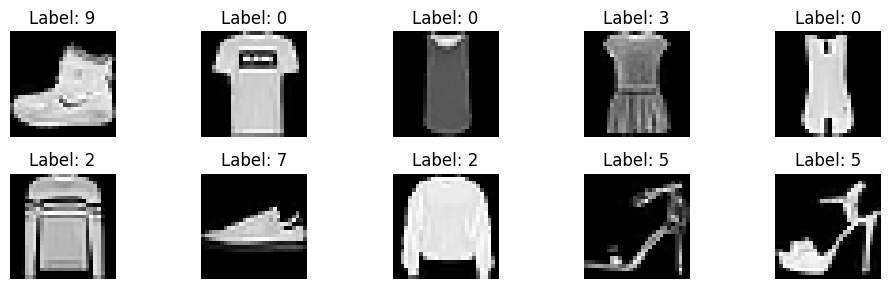

In [2]:
"""📥 Load Fashion MNIST and visualize sample images"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Visualize some samples
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
"""🔄 Preprocess dataset: grayscale → RGB, resize to 224x224, normalize using tf.data"""
def preprocess(image, label):
    image = tf.stack([image] * 3, axis=-1)  # Convert to 3 channels
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [4]:
"""⚙️ Load EfficientNetB0 pretrained on ImageNet as feature extractor"""
from tensorflow.keras import layers

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling="avg"
)
base_model.trainable = False  # freeze initially

model = tf.keras.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
"""🚀 Train model in feature extraction phase (EfficientNet frozen)"""
history = model.fit(train_ds, validation_data=test_ds, epochs=1)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5587s 3s/step - accuracy: 0.1002 - loss: 2.3081 - val_accuracy: 0.1000 - val_loss: 2.3027


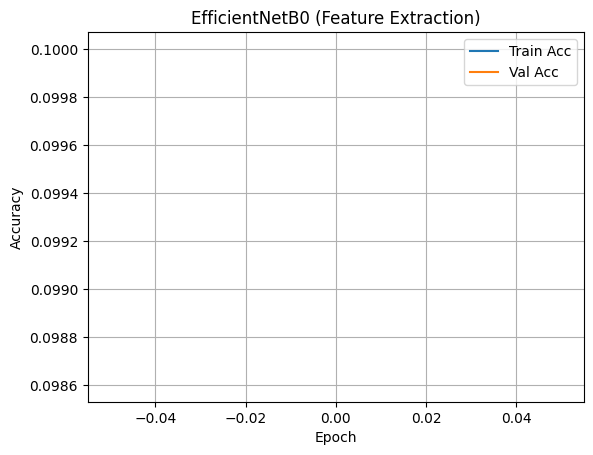

In [6]:
"""📊 Plot accuracy from feature extraction"""
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("EfficientNetB0 (Feature Extraction)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
